<a href="https://colab.research.google.com/github/rozario-lamperouge/Quantum-Computing/blob/master/QuantumComputing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Quantum Computing?

Quantum computing is the use of quantum-mechanical phenomena such as superposition and entanglement to perform computation. Computers that perform quantum computations are known as quantum computers.


---
## What is Quantum?:
In physics, a quantum is the minimum amount of any physical entity involved in an interaction. 



##Classical Computing:

Classical Computers use bits in the form of transistors which take either of two values – 0 or 1.


##Quantum Computing:

Quantum Computing uses Quibits instead of bits.. Quibits are in a combnation of 0 and 1 , instead of being a single value. 

In can even take both in the case of superposition


![alt text](https://miro.medium.com/max/1544/0*IR3gbPgWrgt0SU3M)



---








# Installing Requirements
Qiskit is a package in Python for doing everything you'll ever need with quantum computing.

If you don't have it already, you need to install it. Once it is installed, you need to import it.

In [ ]:
!pip install qiskit
!pip install matplotlib

In [3]:
import qiskit as q
%matplotlib inline

# Load Your IBM account


In [4]:
from qiskit import IBMQ

#loading my secret token from token.txt file
IBMQ.save_account(open('token.txt','r').read())
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Create a Quantum Circuit

Create a Quantum Register 

In [5]:
qr = q.QuantumRegister(2)

Create a Classical Register

In [6]:
cr = q.ClassicalRegister(2)

Create a Quantum Circuit, Consisting both the quantum and classical register

In [18]:
circuit = q.QuantumCircuit(qr,cr)
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

Apply an not gate to the circuit:

In [19]:
circuit.h(0)
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0_0: ═════
           
c0_1: ═════

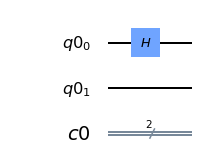

In [20]:
circuit.draw(output='mpl')

## lets create an entanglement!

Apply an Controlled not gate (cx) , the second quibit will return 1 only if the first quibit is 1.

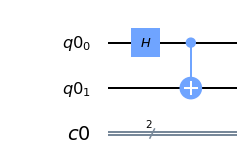

In [21]:
circuit.cx(0,1)
circuit.draw(output='mpl')

## its time to make use of our classical bits!

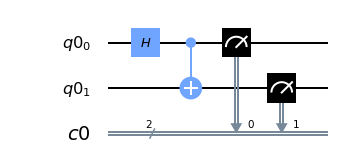

In [22]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

# Run the Code in Simulator :(
  our Quantum circuit is ready now, but before running it in an real quantum computer, lets first run it in a simulator, and see how the resulta looks like.

In [38]:
# Initializing the simulator
simulator = q.Aer.get_backend('qasm_simulator')

# running our circuit using the simulator
job = q.execute(circuit ,backend=simulator)
result = job.result()

time to look at the counts from the simulator

In [39]:
counts = result.get_counts(circuit)
print(counts)

{'11': 520, '00': 504}


lets plot the results, to get a better understanding

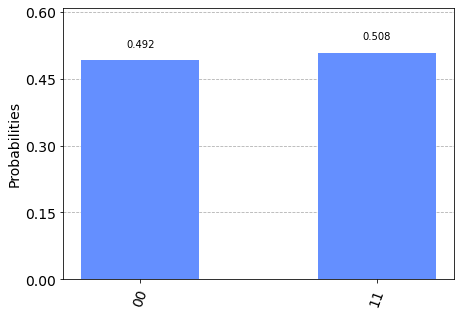

In [40]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

# Finally!, lets run our code in a real quantum computer!! 

we would need to get the provider first

In [27]:
provider = IBMQ.get_provider('ibm-q')

##lets take a look at the available options and we could choose the one we like

we will list the avilable backends, and see the number of qubits each backend has..

In [32]:
for i in provider.backends():
  try:
    print(i, len(i.properties().qubits))
  except:
    print(i, 'simulator')

ibmq_qasm_simulator simulator
ibmqx2 5
ibmq_16_melbourne 15
ibmq_vigo 5
ibmq_ourense 5
ibmq_london 5
ibmq_burlington 5
ibmq_essex 5
ibmq_armonk 1
ibmq_rome 5


now we can select the quantum computer of our choice

In [33]:
qcomp = provider.get_backend('ibmq_16_melbourne')

lets feed our circuit into the quantum computer

In [34]:
job = q.execute(circuit, backend=qcomp)

it takes some time , so lets monitor our job

In [35]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


lets see the results:

In [36]:
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'01': 60, '00': 486, '11': 415, '10': 63}


visualize the counts

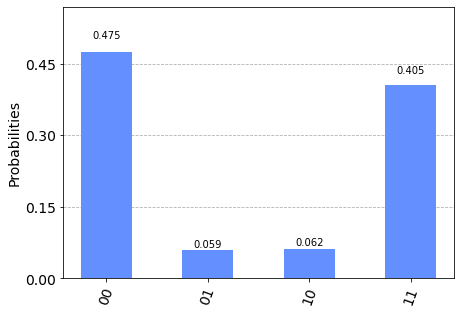

In [37]:
plot_histogram(counts)